YULU

![](https://cdn.dribbble.com/users/610297/screenshots/6662102/yulu-brand-identity.gif)


# About Yulu

Yulu is India’s leading **micro-mobility** service provider, which offers **unique vehicles** for the daily commute. Starting off as a mission to **eliminate traffic congestion in India**, Yulu provides the safest commute solution through a **user-friendly mobile app** to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those ***first and last miles smooth, affordable, and convenient!***

Yulu has **recently** suffered **considerable dips** in its **revenues**. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

In [6]:
# Importing required libraries
# Dataframe libraries
import numpy as np
import pandas as pd
# Visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
# Testing libs
from scipy import stats
from scipy.stats import ttest_ind        # T-test for independent samples
from scipy.stats import shapiro          # Shapiro-Wilk’s test for Normality
from scipy.stats import levene           # Levene's test for Equality of Variance
from scipy.stats import f_oneway         # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
import warnings
warnings.simplefilter('ignore')

In [7]:
#Yulu file link
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2024-07-06 09:25:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.97, 3.162.130.111, 3.162.130.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.02s   

2024-07-06 09:25:46 (32.9 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [8]:
df = pd.read_csv('bike_sharing.csv?1642089089') #pandas read/load function into df variable
df.head() #displays top 5 rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Each feature description
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

#1. Define Problem Statement and perform Exploratory Data Analysis

**Definition of problem (as per given problem statement with additional views)**

***Answer :***
Here the problem for Yulu is that they have seen a drop in rentals recently so they want to know what is the cause for this rentals drop

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**


In [9]:
#General analysis with dataset
#shape and datatypes of each feature
print(f'Shape of Yulu dataset: {df.shape}\n'
      f'------------------------------------------------------------\n'
      f'The below table describes the datatypes of all the features\n')
df.dtypes #function to get all the datatypes

Shape of Yulu dataset: (10886, 12)
------------------------------------------------------------
The below table describes the datatypes of all the features



datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
#Missing value detection
print(f'Total number of nulls present in Yulu dataset are {df.isna().sum()}')

Total number of nulls present in Yulu dataset are datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [11]:
#check for duplicated records
df.duplicated().value_counts()

False    10886
Name: count, dtype: int64

In [12]:
#statistical summary of numerical features
df.iloc[:,5:].describe() #first 4 cariables are categorical columns actually

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
#statistical summary of categorical columns
#actually season, holiday, workingday features are in int64 but actually they are categorical
df[['season','holiday','workingday','weather']].astype('object').describe(include='object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [14]:
#Number of unique items present in each attribute
print('All features with number of unique items')
for i in df.columns:
  print(f'{i}:{df[i].nunique()}')

All features with number of unique items
datetime:10886
season:4
holiday:2
workingday:2
weather:4
temp:49
atemp:60
humidity:89
windspeed:28
casual:309
registered:731
count:822


In [15]:
#value counts of categorical features with unique counts less than 10
categorical_cols = ['season','holiday','workingday','weather']
for i in categorical_cols:
  print(df[i].value_counts()) #prints value
  print('--------------------------------------')

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
--------------------------------------
holiday
0    10575
1      311
Name: count, dtype: int64
--------------------------------------
workingday
1    7412
0    3474
Name: count, dtype: int64
--------------------------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
--------------------------------------


In [17]:
#Range of attributes
for i in df.columns:
  print(f'Min and max values of attribute {i} are {min(df[i]),max(df[i])}')

Min and max values of attribute datetime are ('2011-01-01 00:00:00', '2012-12-19 23:00:00')
Min and max values of attribute season are (1, 4)
Min and max values of attribute holiday are (0, 1)
Min and max values of attribute workingday are (0, 1)
Min and max values of attribute weather are (1, 4)
Min and max values of attribute temp are (0.82, 41.0)
Min and max values of attribute atemp are (0.76, 45.455)
Min and max values of attribute humidity are (0, 100)
Min and max values of attribute windspeed are (0.0, 56.9969)
Min and max values of attribute casual are (0, 367)
Min and max values of attribute registered are (0, 886)
Min and max values of attribute count are (1, 977)


**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**


In [18]:
continuous_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
categorical_cols = ['season','holiday','workingday','weather'] #

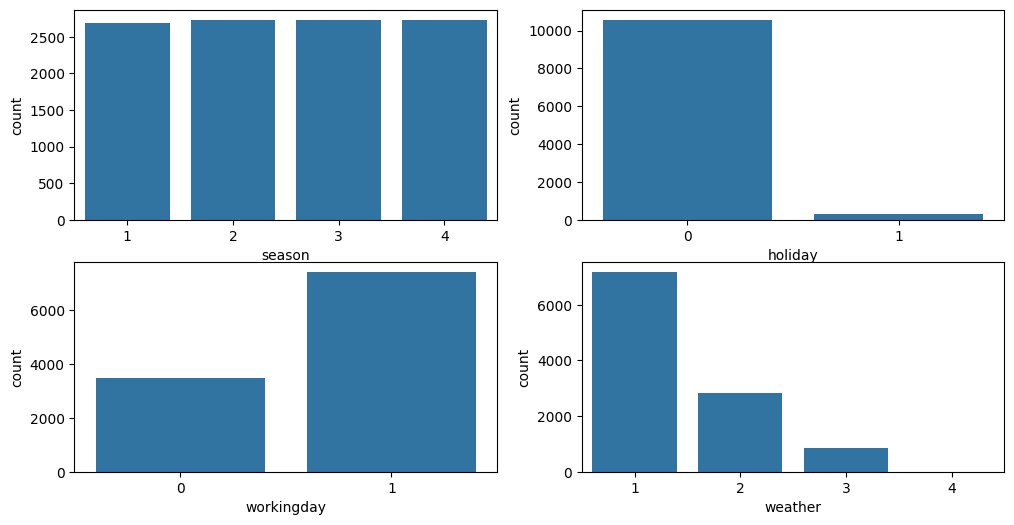

In [22]:
plt.figure(figsize=(12,6))
for i in range(len(categorical_cols)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[categorical_cols[i]])

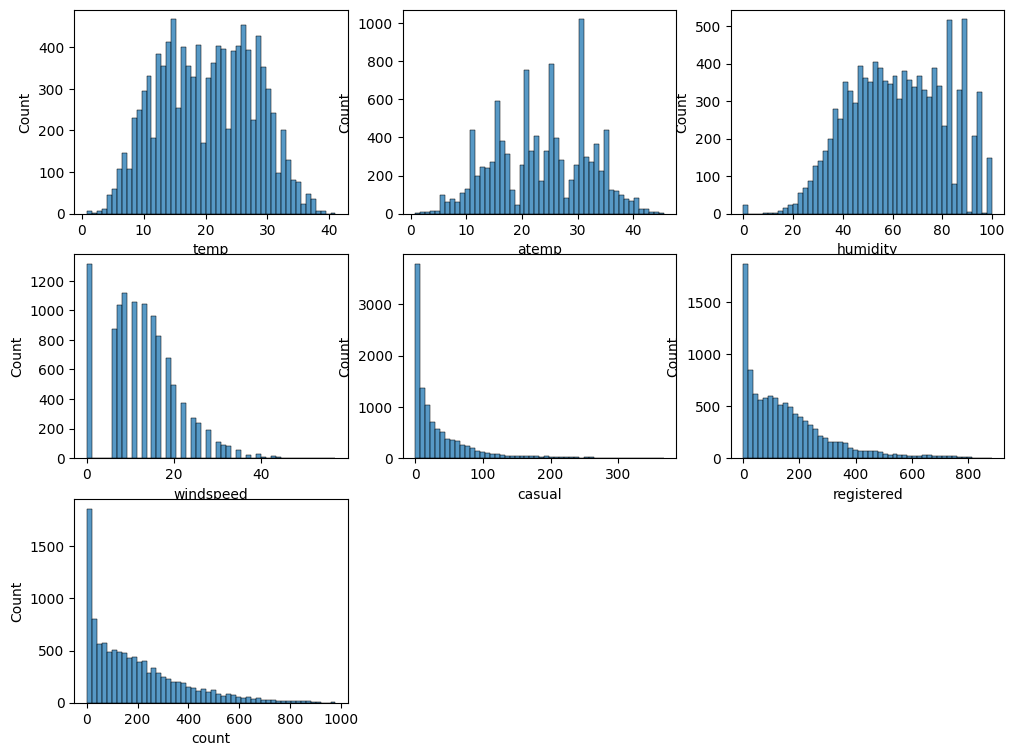

In [21]:
plt.figure(figsize=(12,9))
for i in range(len(continuous_cols)):
  plt.subplot(3,3,i+1)
  sns.histplot(x=df[continuous_cols[i]],bins=50)

**Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count).**


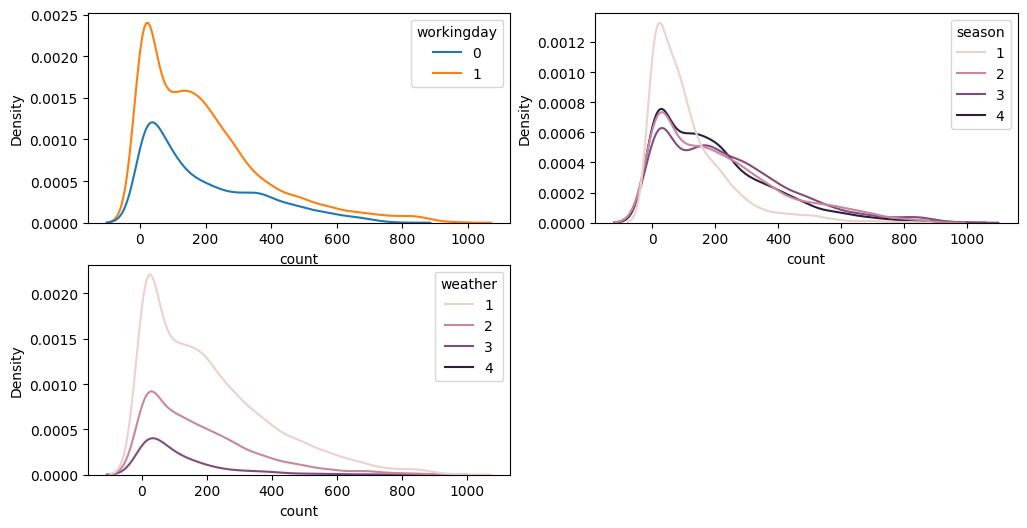

In [20]:
cols = ['workingday','season','weather'] #list as per the question
plt.figure(figsize=(12,6))
for i in range(len(cols)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=df,x='count',hue=cols[i],warn_singular=False)

In [24]:
#converting datetime column from object to datetime
df.datetime = pd.to_datetime(df.datetime)

In [25]:
df.datetime.dtypes

dtype('<M8[ns]')

In [26]:
df_copy = df.copy()
df_copy['year'] = df.datetime.dt.year
df_copy['month'] = df.datetime.dt.month
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


<Axes: xlabel='month', ylabel='count'>

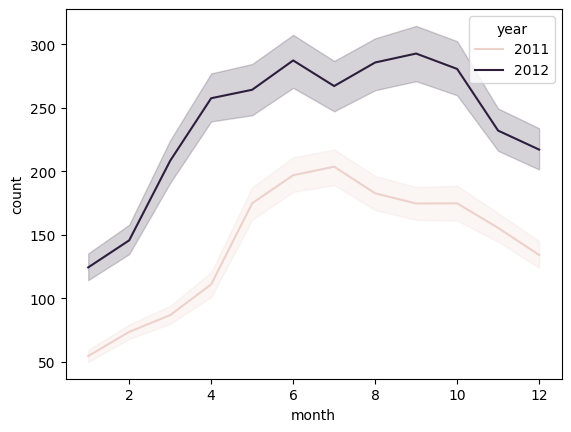

In [ ]:
sns.lineplot(data=df_copy,x='month',y='count',hue='year',)
plt.show()

The below graph is extracted from tableau this shows the trend of count

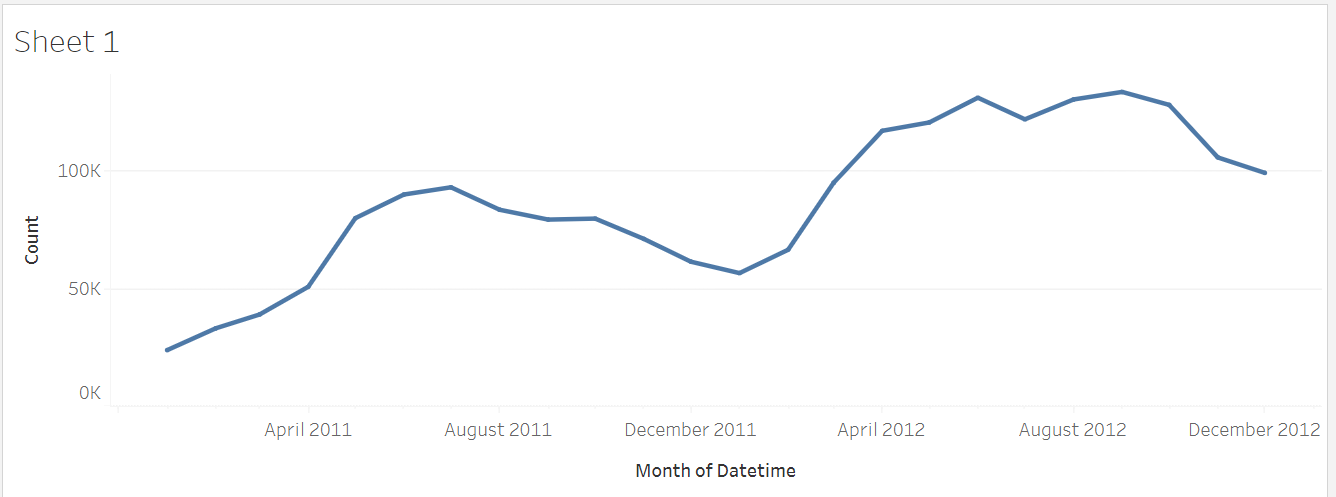

Observation:

* This trend graph is similar from April to December 2011 and 2012
* Where count gradually increased till April then sudden increase and drop down from August till December
* So by seeing this plot by general analysis I can say that count of rentals are gradually decreasing from rainy seasons

**Outliers - For this there is no requirement of their treatment**

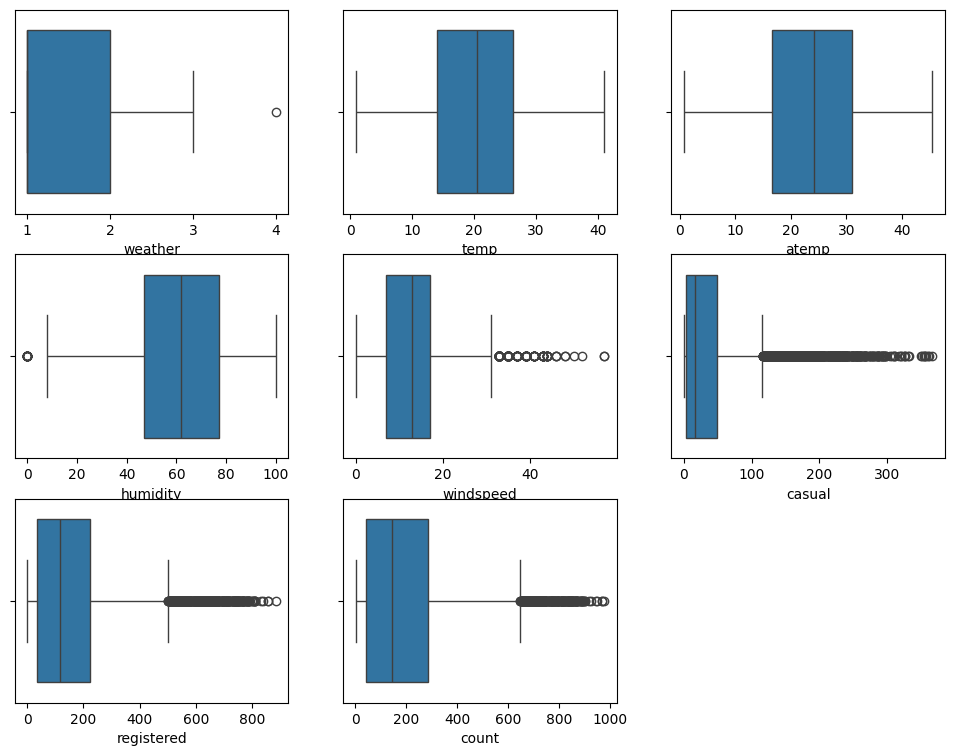

In [ ]:
#boxplots for visualizing outliers
cnt=1
plt.figure(figsize=(12,9))
for col in df.iloc[:,5:].columns:
  plt.subplot(3,3,cnt)
  sns.boxplot(x=col,data=df)
  cnt+=1

In [ ]:
#outlier check by IQR (Interquartile Range)
Q1 = df.iloc[:,5:].quantile(0.25)
Q3 = df.iloc[:,5:].quantile(0.75)
iqr = Q3-Q1
print(iqr)
#actually in this data set there is no need for us to treat outliers
df_iqr = df.iloc[:,5:][~((df.iloc[:,5:]<(Q1-1.5*iqr))|df.iloc[:,5:]>(Q3+1.5*iqr)).any(axis=1)]
df_iqr.head()

temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64


,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Outlier count for each attibute
df_num = df.iloc[:,5:]
for col in df_num.columns:
  Q1 = np.percentile(df[col],25) #obtain 1st quntile
  Q2 = np.percentile(df[col],50) #median actually not required
  Q3 = np.percentile(df[col],75) #obtain 3rd quantile
  iqr = Q3 - Q1 #obtain IQR
  upper = Q3 + 1.5 * iqr #upper whisker point
  lower = Q1 - 1.5 * iqr #lower whisher point
  outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower]) #total number of outliers
  print(f'Total number of outliers ({len(df[col][df[col]< lower])} + {len(df[col][df[col]> upper])}) for {col} is {outliers}')

Total number of outliers (0 + 0) for temp is 0
Total number of outliers (0 + 0) for atemp is 0
Total number of outliers (22 + 0) for humidity is 22
Total number of outliers (0 + 227) for windspeed is 227
Total number of outliers (0 + 749) for casual is 749
Total number of outliers (0 + 423) for registered is 423
Total number of outliers (0 + 300) for count is 300


**correlation heatmaps**

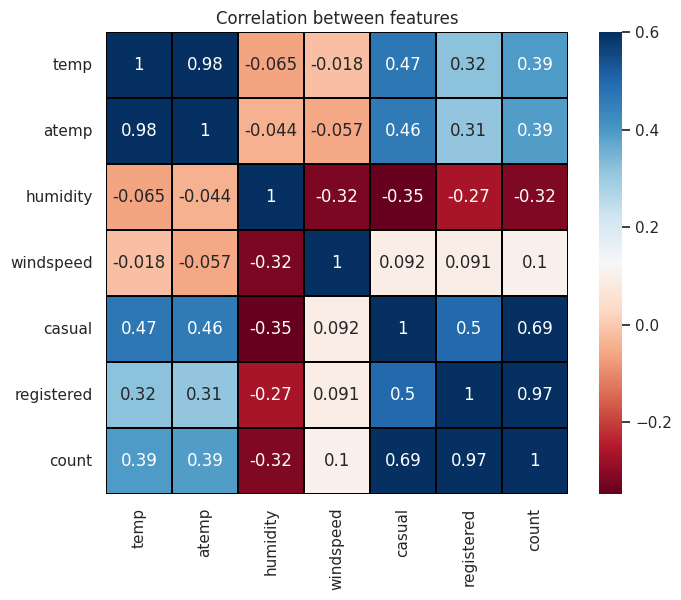

In [ ]:
sns.set(font_scale=1.0) #optional visual enhancement
plt.figure(figsize=(8,6)) #size of heat map
#prepare a heatmap with visual enchancers
sns.heatmap(df_num.corr(),vmax=0.6,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
plt.title('Correlation between features') #title
plt.show()

**Illustrate the insights based on EDA** (Exploratory Data Analysis)

1. Comments on range of attributes, outliers of various attributes


```
range of attributes
```


* Range of datetime lies in January 2011 and December 2012
* seasons and weather have 1 to 4 values but this is a categorical column
* holiday and workingday attibutes have 0 or 1
* temperature columns of temp and atemp almost lies in same range of 0.75 to 45 degrees where these temperatures varies from season to season
* humidity is a discrete attribute and ranges from 0 to 100
* windspeed 0 to ~57 and this is a continuous attribute
* casual, registered and count all 3 are discrete variables where casual ranges from 0-367, registered is from 0-886 and total of both (casual+registered) is 1-977.


```
Outliers
```

* datetime, seasons, weather, holiday, workingday attributes are categorical columns and mostly we don't see any outliers in this kind of columns.
* Both the temperature columns doesn't have any outliers.
* humidity has 22 outliers at lower whisker.
* windspeed has 227 outliers and all over upper whisker.
* casual, registered, count columns have a lot of ouliers of 749, 423, 300 respectively but what is the most important thing is these 3 attributes outliers should not be considered

2. Comments on the distribution of the variables and relationship between them

```
Distribution of variables
```
* temp and atemp have fat or high standard deviation normal distribution
* humidity is left skewed data
* windspeed, casual, registered, count are right skewed


```
Relation between variables
```
* temp vs atemp have high positive relation
* temp vs (casual, registered, count) have almost same relation and positive one

>We can say that as temperature is modarate there are high rentals, basically if the temp is high or low there will be a drop in rentals.

* humidity doesn't have no strong relation with temp and atemp
* humidity have negative relation with windspeed, all counts
>If humidity is high then people tend to choose alternative for yulu

* windspeed doesn't have any notable relation between other variables
* windspeed has a fairly negative relaition with humidity

* casual, registered and count is positively related between themselves

3. Comments for each univariate and bivariate plots


```
Univariate plots
```
* season count plot: All the seasons have almost same count of rentals in all categorical groups
* holiday count plot: holiday have less rentals than non-holiday
* workingday count plot: non-working day have less rentals than working day
* weather count plot: Unanimously we can say that on clear, few, partly cloudy day there are high rentals than any other

```
Bivariate plots
```
* count vs workingday: This is right skewed data where the average is around 200 for working day and less for non-working day
* count vs season: season 1 has the highest average than other seasons and almost same number for other seasons with almost half than in season 1
* count vs weather: clear or partly cloudy day have highly dense than other weather conditions
***





#2. Hypothesis Testing (30 Points):



In [ ]:
#To reduce the coding for every test creating a function
def hypo_result(significane=0.05):
  print(f'significance value = {significance*100}%\n'f'Test result:')
  if p_val < significance:
    print('Reject H0, Conclusion:',Ha)
  else:
    print('Fail to reject H0, Conclusion:',H0)


**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)**

In [ ]:
#Working Day has effect on number of electric cycles rented
#Now lets check wether count is dependent on any of features like workingday, holiday, weather, season
#for this we can use chi2_contingency test
depend = ['workingday']
for i in depend: #General function so it can be copy and pasted when ever requried
  print(f'{i} vs count') #heading
  significance = 0.05 #default alpha
  workday, weekend_holiday = df[df[i]==1]['count'],df[df[i]==0]['count'] #assigning internal group of variables
  #Hypothesis setup
  H0 = f'Mean no. of electric cycles rented on working day and holiday/weekends is equal' #null hypothesis
  Ha = f'Mean no. of electric cycles rented on working day and holiday/weekends are not equal' #alternatehypothesis
  t_stat, p_val = stats.ttest_ind(workday, weekend_holiday) #alternative is two sided
  print(f't_stat:{round(t_stat,2)}, p_value:{p_val}')
  hypo_result() #precreated function
  if i != depend[-1]: #Not mandatory function
    print('------------------------------------')

workingday vs count
t_stat:1.21, p_value:0.22644804226361348
significance value = 5.0%
Test result:
Fail to reject H0, Conclusion: Mean no. of electric cycles rented on working day and holiday/weekends is equal


***Observation***
>Number of cycles rented on a working or non-working day is same that means there is no significant evidence to prove that working/non-working day have a notable difference in bike rentals
***

**ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)**



```
* No. of cycles rented similar or different in different seasons
* No. of cycles rented similar or different in different weather
```



These are numerical vs categorical columns with morethan 2 cate groups so the appropriate test is One-way ANOVA testing if the conditions satisfies else go with kruskal testing

In [ ]:
#As before testing ANOVA we need to check weather the data is satisfying the conditions
''' (i) Data should follow normal distribution and to check it first go with
        qqplot or histogram and confirm and if this test is passed and then
        if you are not sure about it go with shapiro wilk test
    (ii) Variance is to be check by levene test

In [ ]:
#visual testing of normality of the data by Q-Q plot/ histogram
from statsmodels.graphics.gofplots import qqplot
qqplot(df['count'],line='s')

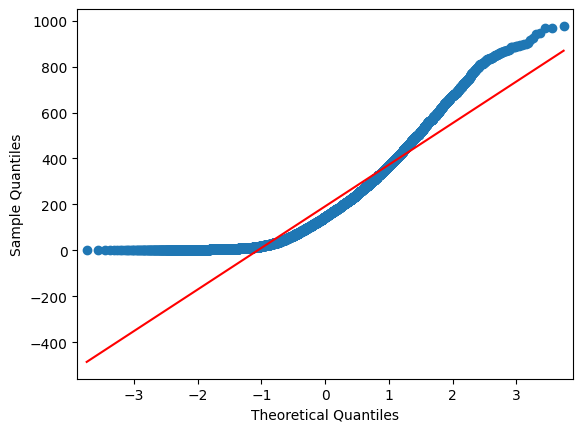

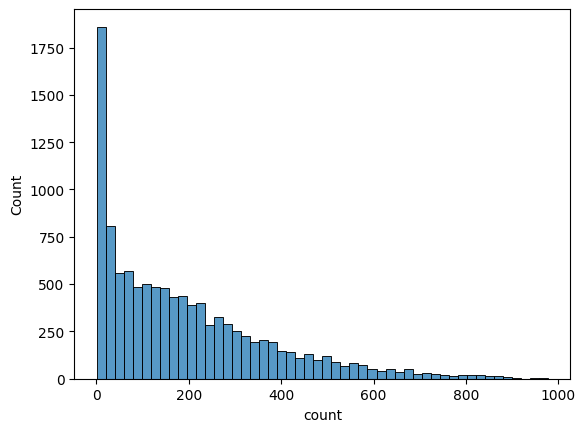

In [ ]:
#If the shape is in bell curve then we can say the data is normally distributed
sns.histplot(data=df,x='count',bins=50)
plt.show()

***Observation:***

>By visual confirmation we can say that the data doesnt follow Gaussian

In [ ]:
#Let's just cross check this again with a nomality test of Shapiro-wilk test
significance=0.05
print('Normality check for count variable') #heading
#setup hypothesis
H0 = 'Data follows Gaussian' #null hypothesis
Ha = 'Data doesnot follow Gaussian' #alternate hypothesis
statistic, p_val = stats.shapiro(df['count'].sample(4000)) #testing
print(f'p_value: {p_val}')
hypo_result()#pre-created fucntion to compare pvalue with significance

Normality check for count variable
p_value: 0.0
significance value = 5.0%
Test result:
Reject H0, Conclusion: Data doesnot follow Gaussian


***Observation:***

>Same result is got with the normality test and says the data doesnt follow Gaussian

In [ ]:
#As the normality test failed levene's test for equal variance test is not actually required but let's just confirm fully by testing
significance = 0.05
for i in ['season','weather']:
  print(f'Variance test on count for groups of {i}') #Heading
  #both season and weather has 4 categories and same representation
  a,b = df[df[i]==1]['count'],df[df[i]==2]['count']
  c,d = df[df[i]==3]['count'],df[df[i]==4]['count']
  #Hypothesis setup
  H0 = 'Data has equal variance' #null hypothesis
  Ha = 'Data dont have equal varianace' #alternate hypothesis
  f_stat, p_val = stats.levene(a,b,c,d) #assigning statistic and pvalue
  print(f'f_stat:{f_stat},p_val:{p_val}')
  hypo_result() #precreated function to check the pvalue with significance
  print('---------------------------------------------------------') #This is for clear understading saying end of one loop

Variance test on count for groups of season
f_stat:187.7706624026276,p_val:1.0147116860043298e-118
significance value = 5.0%
Test result:
Reject H0, Conclusion: Data dont have equal varianace
---------------------------------------------------------
Variance test on count for groups of weather
f_stat:54.85106195954556,p_val:3.504937946833238e-35
significance value = 5.0%
Test result:
Reject H0, Conclusion: Data dont have equal varianace
---------------------------------------------------------


***Observation:***

>As we can see that the data doesn't follow normal distribution and equal variance amoung the groups so, now we can go with kruskal test which is an
alternative to one-way ANOVA can be used only when the data doesn't satisfy the required condition

In [ ]:
for i in ['season','weather']:
  print(f'count vs {i}') #Heading
  #both season and weather has 4 categories and same representation
  a,b = df[df[i]==1]['count'],df[df[i]==2]['count']
  c,d = df[df[i]==3]['count'],df[df[i]==4]['count']
  #Hypothesis setup
  H0 = f'No significant difference in no. of cycles rented and different {i}'
  Ha = f'There is a significant difference in no. of cycles rented and different {i}'
  f_stat, p_val = stats.kruskal(a,b,c,d) #assigning statistic and pvalue
  print(f'f_stat:{f_stat},p_val:{p_val}')
  hypo_result() #precreated function to check the pvalue with significance
  print('---------------------------------------------------------') #This is for clear understading saying end of one loop

count vs season
f_stat:699.6668548181988,p_val:2.479008372608633e-151
significance value = 5.0%
Test result:
Reject H0, Conclusion: There is a significant difference in no. of cycles rented and different season
---------------------------------------------------------
count vs weather
f_stat:205.00216514479087,p_val:3.501611300708679e-44
significance value = 5.0%
Test result:
Reject H0, Conclusion: There is a significant difference in no. of cycles rented and different weather
---------------------------------------------------------


***Observation:***

>Bike rentals depend on different seasons and weather conditions like to be precise in rainy, extreme hot summer days there will be a significant drop in bike rentals

**Chi-square test to check if Weather is dependent on the season (10 points)**

In [ ]:
#All categorical vs categorical columns, crosstab/contingency table
categorical_cols = ['workingday', 'holiday', 'weather', 'season'] #List of all categorical columns
for i in range(len(categorical_cols)):
  for j in range(len(categorical_cols)):
    if i < j: #condition to avoid feature and itself
      print(f'{categorical_cols[i]} vs {categorical_cols[j]}')
      print(pd.crosstab(df[categorical_cols[i]],df[categorical_cols[j]]))
      print('------------------------------------------------------------------------------------')

workingday vs holiday
holiday        0    1
workingday           
0           3163  311
1           7412    0
------------------------------------------------------------------------------------
workingday vs weather
weather        1     2    3  4
workingday                    
0           2353   897  224  0
1           4839  1937  635  1
------------------------------------------------------------------------------------
workingday vs season
season         1     2     3     4
workingday                        
0            858   840   888   888
1           1828  1893  1845  1846
------------------------------------------------------------------------------------
holiday vs weather
weather     1     2    3  4
holiday                    
0        6988  2742  844  1
1         204    92   15  0
------------------------------------------------------------------------------------
holiday vs season
season      1     2     3     4
holiday                        
0        2615  2685  2637  263

In [ ]:
#Weather is dependent on season this we know by confirm but to prove we need to test the data(check between 2 predictor variable)
significance = 0.05 #defalult alpha value
print('season vs weather') #heading
#hypothesis setup
H0 = 'season and weather has no relation or independent' #Null hypothesis
Ha = 'season and weather has a relation or dependent' #Alternate hypothesis
observed  = pd.crosstab(df['season'],df['weather']) #contingency table
print(observed)
#here alternative is 2 sided which is by default so not mentioning in the function
chi_stat, p_val, dof, exp_freq = stats.chi2_contingency(observed) #assigning all the outputs to repectable variable
print(f'chi_stat:{round(chi_stat,2)}, p_value:{p_val}')
hypo_result() #precreated function to check the pvalue with alpha and conclude the result

season vs weather
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0
chi_stat:49.16, p_value:1.549925073686492e-07
significance value = 5.0%
Test result:
Reject H0, Conclusion: season and weather has a relation or dependent


***Observation:***

>By this test we can confirm that weather is dependent on season that means differenent weather conditions depend on different seasons.

>There is a significant evidence to say that weather depends on seasons

#Extra analysis

This is the analysis after the requirement of the client

From available data 68%, 97% of bookings were made on a workingday, non-holiday days respectively
So yulu should mainly focus on a non holiday and a working day

In [ ]:
temp = df_copy.groupby(['year','month'])['count'].sum().reset_index()

In [ ]:
extra = pd.pivot(temp,index=(['month']),columns='year',values='count').reset_index()

In [ ]:
extra['yoy'] = extra[2011]*100/extra[2012]

In [ ]:
extra['mean'] = np.mean(extra['yoy'])

In [ ]:
extra

year,month,2011,2012,yoy,mean
0,1,23552,56332,41.809274,58.404525
1,2,32844,66269,49.561635,58.404525
2,3,38735,94766,40.874364,58.404525
3,4,50517,116885,43.219404,58.404525
4,5,79713,120434,66.188120,58.404525
5,6,89776,130957,68.553800,58.404525
6,7,92848,121769,76.249292,58.404525
7,8,83296,130220,63.965597,58.404525
8,9,79104,133425,59.287240,58.404525
9,10,79522,127912,62.169304,58.404525


In [ ]:
extra['yoy']- extra['mean']

0    -16.595251
1     -8.842890
2    -17.530161
3    -15.185121
4      7.783595
5     10.149275
6     17.844767
7      5.561072
8      0.882715
9      3.764779
10     8.756374
11     3.410846
dtype: float64

* average increase of count of rides booked over year on year is 58%
* for months jan to apr the increase is less than the average YOY
* for months may to july & nov increase in the count is much greater than avg YOY
* other than the above mentioned months there wasn't an increase more than 6%  than last year least rides